In [5]:
!pip install -r requirements.txt


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/916.6 kB ? eta -:--:--
     ------------------------------------- 916.6/916.6 kB 20.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached filelock-3.15.4-py3-none-any.whl.metadata (2.9 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: star

  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [33 lines of output]
      Traceback (most recent call last):
        File "C:\Users\scmmw\AppData\Local\anaconda3\envs\myenv\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "C:\Users\scmmw\AppData\Local\anaconda3\envs\myenv\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\scmmw\AppData\Local\anaconda3\envs\myenv\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 112, in get_requires_for_build_wheel
          backend = _build_backend()
                    ^^^^^^^^^^^^^^^^
        File "C:\Users\scmmw\AppData\Local\anaconda3\envs\myenv\Lib\site-packages\pip\_ven

In [76]:
from einops import rearrange


In [6]:
pip install tensorboardX

In [14]:
# conda install -c conda-forge monai=1.3.2
!pip install monai==1.3.2


  Using cached fsspec-2024.6.1-py3-none-any.whl.metadata (11 kB)
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 23.5 MB/s eta 0:00:00
Using cached fsspec-2024.6.1-py3-none-any.whl (177 kB)


In [34]:
torch.cuda.empty_cache()

In [35]:
# Importing necessary libraries for logging, file handling, and system operations
import logging  # Provides a flexible framework for emitting log messages from Python programs.
import os  # Provides a way of using operating system-dependent functionality, such as reading or writing to the file system.
import shutil  # Used for high-level file operations, such as copying or removing files and directories.
import sys  # Provides access to some variables used or maintained by the Python interpreter and to functions that interact with the interpreter.
import tempfile  # Used to create temporary files and directories.
import random  # Implements pseudo-random number generators for various distributions.
import numpy as np  # Fundamental package for scientific computing with Python, providing support for large, multi-dimensional arrays and matrices.
from tqdm import trange  # Provides a progress bar for loops, making it easier to track long-running tasks.
import matplotlib.pyplot as plt  # A plotting library used for creating static, animated, and interactive visualizations in Python.
import torch  # PyTorch, an open-source machine learning library based on the Torch library, used for applications such as computer vision and natural language processing.
#from skimage.util import random_noise  # A function to add random noise of various types to an image.
# Importing functions and classes from the MONAI library, a deep learning framework specialized for healthcare imaging
from monai.apps import download_and_extract  # Utility to download and extract files, particularly useful for datasets.
from monai.config import print_config  # Prints the current configuration of MONAI, including the environment, installed packages, and versions.
from monai.data import CacheDataset, DataLoader  # CacheDataset caches data and is useful for datasets that fit in memory. DataLoader is used to load the data in batches.
from monai.networks.nets import AutoEncoder, SwinUNETR  # Importing an AutoEncoder model, which is a type of neural network used for unsupervised learning, particularly for dimensionality reduction.
from monai.transforms import (  # Importing various transformations to be applied to the data.
    EnsureChannelFirstD,  # Ensures the channel dimension is first in the data tensor.
    Compose,  # Allows the chaining of multiple transformations to be applied sequentially.
    LoadImageD,  # Loads images from a file.
    RandFlipD,  # Randomly flips the image along a specified axis.
    RandRotateD,  # Randomly rotates the image within a specified angle range.
    RandZoomD,  # Randomly zooms in or out of the image within a specified range.
    ScaleIntensityD,  # Scales the intensity of the image to a specified range.
    EnsureTypeD,  # Ensures the output is of a specific data type.
    Lambda,  # Allows for custom transformations using a lambda function.
    #AddChannelD
)
from monai.utils import set_determinism  # Sets the seed for random number generators to ensure reproducibility.
from monai.networks.utils import copy_model_state
from monai.networks.nets.swin_unetr import filter_swinunetr
from monai.transforms import RandSpatialCropd
import math
import warnings
from typing import List

from torch import nn as nn
from torch.optim import Adam, Optimizer
from torch.optim.lr_scheduler import LambdaLR, _LRScheduler
import os
import random
import glob
import numpy as np
import pydicom
import matplotlib.pyplot as plt
from tensorboardX import SummaryWriter
# Print the current MONAI configuration
print_config()
#from Hand_Scan_Dataset import HandScanDataset2, train_df, valid_df, training_data_dir
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import logging
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm
import time
import torch.nn.functional as F
import psutil  # For memory tracking
import gc
from torch.cuda.amp import autocast
import pandas as pd  # For data manipulation and analysis
# Standard library imports
from pathlib import Path  # To handle and manipulate filesystem paths
import os  # For interacting with the operating system
import glob  # For finding all file paths matching a specified pattern

# Third-party imports
import numpy as np  # For numerical operations and handling arrays
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
from PIL import Image  # For opening, manipulating, and saving many different image file formats

# PyTorch imports
import torch  # Main PyTorch library for building and training neural networks
from torch.utils.data import Dataset, DataLoader  # For handling datasets and data loaders
import torch.nn.functional as F

# PyTorch-I/O extension
import torchio as tio  # For medical image processing in PyTorch

# pydicom imports
import pydicom  # For reading, modifying, and writing DICOM files
from pydicom.data import get_testdata_file  # For accessing test DICOM files
from pydicom.fileset import FileSet  # For working with DICOM FileSets

# Scikit-learn imports
from sklearn.model_selection import train_test_split  # For splitting datasets into training and testing sets

from collections import defaultdict
from monai.transforms import apply_transform



MONAI version: 1.3.2
Numpy version: 1.26.4
Pytorch version: 2.4.0
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: 59a7211070538586369afd4a01eca0a7fe2e742e
MONAI __file__: c:\Users\<username>\AppData\Local\anaconda3\envs\myenv\Lib\site-packages\monai\__init__.py

Optional dependencies:
Pytorch Ignite version: 0.4.11
ITK version: 5.4.0
Nibabel version: 5.2.1
scikit-image version: 0.24.0
scipy version: 1.14.1
Pillow version: 10.4.0
Tensorboard version: 2.17.1
gdown version: 5.2.0
TorchVision version: 0.19.0
tqdm version: 4.66.5
lmdb version: 1.5.1
psutil version: 5.9.0
pandas version: 2.2.2
einops version: 0.8.0
transformers version: NOT INSTALLED or UNKNOWN VERSION.
mlflow version: 2.15.1
pynrrd version: 1.0.0
clearml version: 1.16.4

For details about installing the optional dependencies, please visit:
    https://docs.monai.io/en/latest/installation.html#installing-the-recommended-dependencies



In [36]:
# Set up basic logging configuration to output log messages to the console (stdout).
# The logging level is set to INFO, meaning all messages at this level and above
# (INFO, WARNING, ERROR, CRITICAL) will be displayed.
logging.basicConfig(stream=sys.stdout, level=logging.INFO)


# Set deterministic behavior for reproducibility. This is important in experiments where
# you want to ensure that the results are the same every time the code is run. 
# The seed value is set to 0, which will be used to initialize the random number generator.
set_determinism(0)

# Determine the device to run the computations on. If a CUDA-capable GPU is available,
# the device will be set to "cuda" (meaning GPU); otherwise, it will fall back to "cpu".
# This allows the code to take advantage of GPU acceleration if possible.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [37]:
import matplotlib.pyplot as plt
import torch

def plot_ims(ims, shape=None, figsize=(10, 10), titles=None):
    shape = (1, len(ims)) if shape is None else shape
    plt.subplots(*shape, figsize=figsize)
    for i, im in enumerate(ims):
        plt.subplot(*shape, i + 1)
        
        # Convert numpy array to a compatible data type if needed
        if isinstance(im, np.ndarray):
            im = im.astype(np.float32)  # Convert to a supported type like float32
            im = torch.from_numpy(im)
        
        # Squeeze the image if it's a tensor
        if isinstance(im, torch.Tensor):
            im = torch.squeeze(im)
        
        plt.imshow(im, cmap="gray")
        
        if titles is not None:
            plt.title(titles[i])
        plt.axis("off")
    
    plt.tight_layout()
    plt.show()


In [38]:
'''
# Define a custom transformation using MONAI's Lambda transform.
# The transformation applies two types of noise to the image: Gaussian noise and Salt & Pepper noise.
# It creates a dictionary with three keys: "orig" (original image), "gaus" (image with Gaussian noise),
# and "s&p" (image with Salt & Pepper noise).
NoiseLambda = Lambda(
    lambda d: {
        "orig": d["im"],  # Original image
        "gaus": torch.tensor(random_noise(d["im"], mode="gaussian"), dtype=torch.float32),  # Gaussian noise
        "s&p": torch.tensor(random_noise(d["im"], mode="s&p", salt_vs_pepper=0.1)),  # Salt & Pepper noise
    }
)

# Define the set of transformations to apply to the training data.
train_transforms = Compose(
    [
        LoadImageD(keys=["im"]),  # Load the image from file
        EnsureChannelFirstD(keys=["im"]),  # Ensure the image has the channel dimension first (e.g., [C, H, W])
        ScaleIntensityD(keys=["im"]),  # Scale the intensity of the image to a specific range (default 0 to 1)
        RandRotateD(keys=["im"], range_x=np.pi / 12, prob=0.5, keep_size=True),  # Randomly rotate the image
        RandFlipD(keys=["im"], spatial_axis=0, prob=0.5),  # Randomly flip the image along the specified axis
        RandZoomD(keys=["im"], min_zoom=0.9, max_zoom=1.1, prob=0.5),  # Randomly zoom in/out on the image
        EnsureTypeD(keys=["im"]),  # Ensure the image is a PyTorch tensor with appropriate data type
        NoiseLambda,  # Apply the custom noise transformation
    ]
)

# Define the set of transformations to apply to the test data.
test_transforms = Compose(
    [
        LoadImageD(keys=["im"]),  # Load the image from file
        EnsureChannelFirstD(keys=["im"]),  # Ensure the image has the channel dimension first
        ScaleIntensityD(keys=["im"]),  # Scale the intensity of the image to a specific range
        EnsureTypeD(keys=["im"]),  # Ensure the image is a PyTorch tensor with appropriate data type
        NoiseLambda,  # Apply the custom noise transformation
    ]
)
'''

'\n# Define a custom transformation using MONAI\'s Lambda transform.\n# The transformation applies two types of noise to the image: Gaussian noise and Salt & Pepper noise.\n# It creates a dictionary with three keys: "orig" (original image), "gaus" (image with Gaussian noise),\n# and "s&p" (image with Salt & Pepper noise).\nNoiseLambda = Lambda(\n    lambda d: {\n        "orig": d["im"],  # Original image\n        "gaus": torch.tensor(random_noise(d["im"], mode="gaussian"), dtype=torch.float32),  # Gaussian noise\n        "s&p": torch.tensor(random_noise(d["im"], mode="s&p", salt_vs_pepper=0.1)),  # Salt & Pepper noise\n    }\n)\n\n# Define the set of transformations to apply to the training data.\ntrain_transforms = Compose(\n    [\n        LoadImageD(keys=["im"]),  # Load the image from file\n        EnsureChannelFirstD(keys=["im"]),  # Ensure the image has the channel dimension first (e.g., [C, H, W])\n        ScaleIntensityD(keys=["im"]),  # Scale the intensity of the image to a spe

In [39]:
'''

NoiseLambda = Lambda(
    lambda d: {
        "im": d["im"],  # Preserve the original image key
        "orig": d["im"].clone(),  # Store a copy of the original image
        "gaus": torch.tensor(random_noise(d["im"].numpy(), mode="gaussian"), dtype=torch.float32),
        "s&p": torch.tensor(random_noise(d["im"].numpy(), mode="s&p", salt_vs_pepper=0.1), dtype=torch.float32),
    }
)


train_transforms = Compose(
    [
        AddChannelD(keys=["im"]),
        ScaleIntensityD(keys=["im"]),
        RandRotateD(keys=["im"], range_x=np.pi / 12, prob=0.5, keep_size=True),
        RandFlipD(keys=["im"], spatial_axis=0, prob=0.5),
        RandZoomD(keys=["im"], min_zoom=0.9, max_zoom=1.1, prob=0.5),
        EnsureTypeD(keys=["im"]),
        NoiseLambda,
    ]
)

test_transforms = Compose(
    [
        AddChannelD(keys=["im"]),
        ScaleIntensityD(keys=["im"]),
        EnsureTypeD(keys=["im"]),
        NoiseLambda,
    ]
)'''

'''from monai.transforms import Compose, ScaleIntensityD, RandRotateD, RandFlipD, RandZoomD, EnsureTypeD, Lambda
import torch
import numpy as np
from skimage.util import random_noise

# Save the original image before applying transformations
SaveOriginalLambda = Lambda(
    lambda d: {
        "im": d["im"],  # Original image key
        "orig": d["im"].clone(),  # Save a clone of the original image
    }
)

# Add noise transformations while preserving the original
NoiseLambda = Lambda(
    lambda d: {
        **d,  # Keep the original keys
        "gaus": torch.tensor(random_noise(d["orig"].numpy(), mode="gaussian"), dtype=torch.float32),  # Gaussian noise on original
        "s&p": torch.tensor(random_noise(d["orig"].numpy(), mode="s&p", salt_vs_pepper=0.1), dtype=torch.float32),  # Salt & Pepper noise on original
    }
)

train_transforms = Compose(
    [
        # AddChannelD(keys=["im"]),
        SaveOriginalLambda,  # Save the original image before any transformations
        ScaleIntensityD(keys=["im"]),
        RandRotateD(keys=["im"], range_x=np.pi / 12, prob=0.5, keep_size=True),
        RandFlipD(keys=["im"], spatial_axis=0, prob=0.5),
        RandZoomD(keys=["im"], min_zoom=0.9, max_zoom=1.1, prob=0.5),
        EnsureTypeD(keys=["im"]),
        #NoiseLambda,  # Apply noise to the stored original image
    ]
)

test_transforms = Compose(
    [
        # AddChannelD(keys=["im"]),
        SaveOriginalLambda,  # Save the original image before applying noise
        ScaleIntensityD(keys=["im"]),
        EnsureTypeD(keys=["im"]),
        #NoiseLambda,  # Apply noise to the stored original image
    ]
)
'''

train_transforms = RandSpatialCropd(keys=["im"], roi_size=(96, 96, 96), random_center=True, random_size=False)
test_transforms = RandSpatialCropd(keys=["im"], roi_size=(96, 96, 96), random_center=True, random_size=False)

In [40]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the base directory and CSV path
training_data_dir = r'c:\Users\scmmw\OneDrive - University of Leeds\t1_vibe_we_hand_subset'
csv_path = r'C:\Users\scmmw\OneDrive - University of Leeds\t1_vibe_we_hand_subset\training_labels_subset.csv'

# Read the labels DataFrame
labels_df = pd.read_csv(csv_path)

# Split the data into training and validation sets
train_df, valid_df = train_test_split(labels_df, test_size=0.2, random_state=42, stratify=labels_df['progression'])

# Save the splits for reference (optional)
train_df.to_csv(os.path.join(training_data_dir, 'train_split.csv'), index=False)
valid_df.to_csv(os.path.join(training_data_dir, 'valid_split.csv'), index=False)


In [41]:
# Construct full paths to patient directories for training and validation
train_patient_dirs = [os.path.join(training_data_dir, subject_name) for subject_name in train_df['patient ID'].tolist()]
valid_patient_dirs = [os.path.join(training_data_dir, subject_name) for subject_name in valid_df['patient ID'].tolist()]


In [42]:
import os
import glob
import torch
import pydicom
import numpy as np
from torch.utils.data import Dataset

class HandScanDataset2(Dataset):
    def __init__(self, data_dir, transform=None, device=None):
        """
        Args:
            patient_dirs (list): List of paths to the patient directories.
            transform (callable, optional): Optional transform to be applied on a sample.
            device (torch.device, optional): Device to use for tensor operations (e.g., 'cuda' or 'cpu').
        """
        self.data_dir = sorted(data_dir)
        self.transform = transform
        self.device = device if device else torch.device('cpu')

    def __len__(self):
        return len(self.data_dir)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        # Get the patient directory based on the index
        patient_dir = self.data_dir[idx]

        # Load and process images from the patient directory
        images = self.get_best_patient_images(patient_dir)

        if len(images) == 0:
            raise ValueError(f"No images found for patient directory {patient_dir}")

        # Correct use of autocast and tensor creation
        with torch.amp.autocast(device_type=self.device.type, dtype=torch.float16):
            # Proper handling of tensor conversion
            images = [
                torch.tensor(img, dtype=torch.float32).to(self.device) if not isinstance(img, torch.Tensor) else img.to(self.device).float()
                for img in images
            ]
            
            images_tensor = torch.stack(images, dim=0).to(self.device)
            images_tensor_channel = torch.unsqueeze(images_tensor, 0)  # Add a channel dimension


        # Prepare the data dictionary with the image tensor
        data = {"im": images_tensor_channel}

        # Apply any provided transforms
        if self.transform:
            data = self.transform(data)  # Assuming transform takes and returns a dictionary

        return data


    def get_best_patient_images(self, base_path):
        """ 
        Process all images in the 't1_vibe_we' subfolder of each subject.
        Sort images by Instance Number and return a sequence of a fixed length.
        """
        seq_len = 32
        all_images = []
        dicom_files = [] 
        target_size = (512, 512)  # Set a fixed image shape

        for root, dirs, files in os.walk(base_path):
            if 't1_vibe_we' in dirs:
                t1_vibe_we_path = os.path.join(root, 't1_vibe_we')
                
                # Get the images in the 't1_vibe_we' sequence
                dicom_files = []
                for image_path in glob.glob(os.path.join(t1_vibe_we_path, '*')):
                    try:
                        dicom_file = pydicom.dcmread(image_path)
                        dicom_files.append((dicom_file, image_path))
                    except Exception as e:
                        print(f"Error reading {image_path}: {e}")


            # Sort the files by Instance Number
            dicom_files.sort(key=lambda x: x[0].InstanceNumber)
            
            # Remove duplicates
            dicom_files = self.remove_duplicates(dicom_files)

            # Find the best slice
            if dicom_files:
                # Find the slice with the highest intensity
                max_sum = -1
                best_dicom_file, best_image_path = None, None
                for dicom_file, image_path in dicom_files:
                    image = dicom_file.pixel_array
                    image_sum = np.sum(image)
                    if image_sum > max_sum:
                        max_sum = image_sum
                        best_dicom_file, best_image_path = dicom_file, image_path

                if best_dicom_file is not None:
                    best_instance_number = best_dicom_file.InstanceNumber

                    # Calculate the central slice index
                    central_index = best_instance_number - 1  # InstanceNumber is 1-based

                    # Determine the range of slices to extract the central 5 slices
                    start_index = max(0, central_index - 2)
                    end_index = min(len(dicom_files), central_index + 3)

                    # Extract the central 5 slices
                    selected_slices = dicom_files[start_index:end_index]

                    images = []
                    for dicom_file, image_path in selected_slices:
                        try:
                            image = self.process_dicom_image(image_path, target_size=target_size)
                            images.append(image)
                        except Exception as e:
                            print(f"Error processing image {image_path}: {e}")

                    # Pad to the required sequence length if needed
                    if len(images) < seq_len:
                        # Pad with zero images of the same shape as the original images
                        diff = seq_len - len(images)
                        images.extend([torch.zeros(target_size, dtype=torch.float32).to(self.device) for _ in range(diff)])

                    all_images.extend(images)

        return all_images


    def remove_duplicates(self, dicom_files):
        """ Remove duplicate instance numbers, keeping only the slice with the highest sum of intensities. """
        instance_dict = defaultdict(list)

        for dicom_file, image_path in dicom_files:
            instance_number = dicom_file.InstanceNumber
            instance_dict[instance_number].append((dicom_file, image_path))

        # Compare DICOM files with the same Instance Number
        unique_dicom_files = []
        for instance_number, files in instance_dict.items():
            if len(files) > 1:
                best_slice = self.find_best_slice(files)
                unique_dicom_files.append(best_slice)
            else:
                unique_dicom_files.append(files[0])

        return unique_dicom_files

    def find_best_slice(self, dicom_files):
        """ Find the slice with the 'DOTAREM' ContrastBolusAgent or, as a fallback, return the first available slice. """
        best_slice = None

        # Check for the slice with 'DOTAREM'
        for dicom_file, image_path in dicom_files:
            if hasattr(dicom_file, 'ContrastBolusAgent') and dicom_file.ContrastBolusAgent == 'DOTAREM':
                best_slice = (dicom_file, image_path)
                break  # Stop searching once we find the 'DOTAREM' slice

        # Fallback: If no slice with 'DOTAREM' is found, return the first slice
        if best_slice is None:
            best_slice = dicom_files[0]

        return best_slice

    def process_dicom_image(self, path: str, resize=True, target_size=(512, 512)) -> torch.Tensor:
        dicom_file = pydicom.dcmread(path)
        image = torch.tensor(dicom_file.pixel_array, dtype=torch.float32).to(self.device)
        
        # Skip invalid images
        if 0 in image.shape:
            print(f"Skipping image due to invalid shape: {image.shape}")
            return torch.zeros(target_size, dtype=torch.float32).to(self.device)
        
        # Use autocast to optimize tensor operations
        with torch.amp.autocast(device_type=self.device.type, dtype=torch.float16):
            # Normalize the image: Zero mean and unit variance
            mean = image.mean()
            std = image.std()
            image = (image - mean) / (std + 1e-7)

            # Apply 95% clipping
            lower_bound = torch.quantile(image, 0.025)
            upper_bound = torch.quantile(image, 0.975)
            image = torch.clamp(image, lower_bound, upper_bound)

            # Normalize again after clipping
            mean = image.mean()
            std = image.std()
            image = (image - mean) / (std + 1e-7)

            # Resize the image to the target size
            if resize:
                image = image.unsqueeze(0)  # Add channel dimension for resizing
                image = torch.nn.functional.interpolate(image.unsqueeze(0), size=target_size, mode='bilinear', align_corners=False).squeeze(0).squeeze(0)
        
        return image



In [43]:
class CachedDataset(Dataset):
    def __init__(self, original_dataset):
        self.data = []
        for i in range(len(original_dataset)):
            sample = original_dataset[i]
            self.data.append(sample["im"])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return {"im": self.data[idx]}

In [44]:
# Define the device to be used for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device


device(type='cuda')

In [45]:
batch_size = 1
num_workers = 0

# Select a few subjects (e.g., the first three subjects)
train_subset_df = train_patient_dirs[:80]
# Initialize the dataset with the selected subjects
train_ds = HandScanDataset2(data_dir=train_subset_df, transform=train_transforms, device=torch.device("cuda"))
# Create a data loader for testing
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=num_workers)

# Select a few subjects (e.g., the first three subjects)
valid_subset_df = valid_patient_dirs[:20]
# Initialize the dataset with the selected subjects
train_dataset = HandScanDataset2( data_dir=valid_subset_df, transform=test_transforms, device=torch.device("cuda"))
# Create a data loader for testing
test_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)


In [46]:
'''# Batch size and number of workers
batch_size = 1
num_workers = 0

# Select a few subjects for training (e.g., the first 80 subjects)
train_subset_df = train_df.iloc[:80]
train_dataset = HandScanDataset2(data_dir=training_data_dir, transform=train_transforms, device=torch.device("cpu"))  # Use CPU for initial loading

# Cache the training dataset in memory
cached_train_dataset = CachedDataset(train_dataset)

# Create a DataLoader for the cached training dataset
train_loader = DataLoader(cached_train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)

# Select a few subjects for validation (e.g., the first 20 subjects)
valid_subset_df = valid_df.iloc[:20]
valid_dataset = HandScanDataset2(data_dir=training_data_dir, transform=test_transforms, device=torch.device("cpu"))  # Use CPU for initial loading

# Cache the validation dataset in memory
cached_valid_dataset = CachedDataset(valid_dataset)

# Create a DataLoader for the cached validation dataset
test_loader = DataLoader(cached_valid_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

# After creating the DataLoader, move the data to the GPU
for i in range(len(cached_train_dataset)):
    cached_train_dataset.data[i] = cached_train_dataset.data[i].to(torch.device("cuda"))

for i in range(len(cached_valid_dataset)):
    cached_valid_dataset.data[i] = cached_valid_dataset.data[i].to(torch.device("cuda"))
'''

'# Batch size and number of workers\nbatch_size = 1\nnum_workers = 0\n\n# Select a few subjects for training (e.g., the first 80 subjects)\ntrain_subset_df = train_df.iloc[:80]\ntrain_dataset = HandScanDataset2(data_dir=training_data_dir, transform=train_transforms, device=torch.device("cpu"))  # Use CPU for initial loading\n\n# Cache the training dataset in memory\ncached_train_dataset = CachedDataset(train_dataset)\n\n# Create a DataLoader for the cached training dataset\ntrain_loader = DataLoader(cached_train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)\n\n# Select a few subjects for validation (e.g., the first 20 subjects)\nvalid_subset_df = valid_df.iloc[:20]\nvalid_dataset = HandScanDataset2(data_dir=training_data_dir, transform=test_transforms, device=torch.device("cpu"))  # Use CPU for initial loading\n\n# Cache the validation dataset in memory\ncached_valid_dataset = CachedDataset(valid_dataset)\n\n# Create a DataLoader for the cached validation datas

In [47]:
class EarlyStopper:
    def __init__(self, patience=1, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_validation_loss = float('inf')
        self.activation_count = 0

    def early_stop(self, validation_loss):
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
        elif validation_loss > (self.min_validation_loss + self.min_delta):
            self.counter += 1
            if self.counter >= self.patience:
                self.activation_count += 1
                return True
        return False

# Instantiate EarlyStopper
early_stopper = EarlyStopper(patience=3, min_delta=0.001)

In [48]:
'''def train(dict_key_for_training, max_epochs=10, learning_rate=1e-3):
    model = AutoEncoder(
        spatial_dims=3,
        in_channels=1,
        out_channels=1,
        channels=(4, 8, 16, 32),
        strides=(2, 2, 2, 2),
    ).to(device)

    # Create loss function and optimizer
    loss_function = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), learning_rate)

    epoch_loss_values = []

    t = trange(max_epochs, desc=f"{dict_key_for_training} -- epoch 0, avg loss: inf", leave=True)
    for epoch in t:
        model.train()
        epoch_loss = 0
        step = 0
        for batch_data in train_loader:
            step += 1

            # Check if the key exists in batch_data
            if dict_key_for_training not in batch_data:
                raise KeyError(f"Key '{dict_key_for_training}' not found in batch data. Available keys: {batch_data.keys()}")

            inputs = batch_data[dict_key_for_training].squeeze(dim=2).to(device)
            optimizer.zero_grad()
            outputs = model(inputs)

            # Ensure the "orig" key is present
            if "orig" not in batch_data:
                raise KeyError("'orig' key not found in batch data. Available keys: {batch_data.keys()}")
            loss = loss_function(outputs, batch_data["orig"].to(device))
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        
        epoch_loss /= step
        epoch_loss_values.append(epoch_loss)
        t.set_description(
            f"{dict_key_for_training} -- epoch {epoch + 1}" + f", average loss: {epoch_loss:.4f}"
        )
    
    return model, epoch_loss_values
'''

'def train(dict_key_for_training, max_epochs=10, learning_rate=1e-3):\n    model = AutoEncoder(\n        spatial_dims=3,\n        in_channels=1,\n        out_channels=1,\n        channels=(4, 8, 16, 32),\n        strides=(2, 2, 2, 2),\n    ).to(device)\n\n    # Create loss function and optimizer\n    loss_function = torch.nn.MSELoss()\n    optimizer = torch.optim.Adam(model.parameters(), learning_rate)\n\n    epoch_loss_values = []\n\n    t = trange(max_epochs, desc=f"{dict_key_for_training} -- epoch 0, avg loss: inf", leave=True)\n    for epoch in t:\n        model.train()\n        epoch_loss = 0\n        step = 0\n        for batch_data in train_loader:\n            step += 1\n\n            # Check if the key exists in batch_data\n            if dict_key_for_training not in batch_data:\n                raise KeyError(f"Key \'{dict_key_for_training}\' not found in batch data. Available keys: {batch_data.keys()}")\n\n            inputs = batch_data[dict_key_for_training].squeeze(dim=2)

In [49]:
'''output_dir = "./output"
log_dir = "./logs"

# Set up basic logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger("swin_transformer_3d")

# Create a TensorBoard writer
writer = SummaryWriter(log_dir=log_dir)

# Contrastive Loss Function
def contrastive_loss(zsim, zlabel, alpha=0.05):
    bce_loss = nn.BCEWithLogitsLoss()
    return alpha * bce_loss(zsim, zlabel)

def train(dict_key_for_training, max_epochs=10, learning_rate=1e-3, alpha=0.05, patience=5):
    model = AutoEncoder(
        spatial_dims=3,
        in_channels=1,
        out_channels=1,
        channels=(4, 8, 16, 32),
        strides=(2, 2, 2, 2),
    ).to(device)

    loss_function = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    early_stopper = EarlyStopper(patience=patience)

    epoch_loss_values = []

    for epoch in range(max_epochs):
        model.train()
        epoch_loss = 0
        step = 0
        for batch_data in train_loader:
            step += 1

            if dict_key_for_training not in batch_data:
                raise KeyError(f"Key '{dict_key_for_training}' not found in batch data. Available keys: {batch_data.keys()}")

            inputs = batch_data[dict_key_for_training].squeeze(dim=2).to(device)
            optimizer.zero_grad()
            outputs = model(inputs)

            if "orig" not in batch_data:
                raise KeyError("'orig' key not found in batch data. Available keys: {batch_data.keys()}")

            loss = loss_function(outputs, batch_data["orig"].to(device))
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        epoch_loss /= step
        epoch_loss_values.append(epoch_loss)

        logger.info(f"Epoch {epoch + 1}/{max_epochs}, Loss: {epoch_loss:.4f}")

        # Validation loop
        total_val_loss = 0.0
        model.eval()
        with torch.no_grad():
            for batch_data in test_loader:
                inputs = batch_data[dict_key_for_training].squeeze(dim=2).to(device)
                outputs = model(inputs)

                loss_L1 = loss_function(outputs, batch_data["orig"].to(device))
                total_val_loss += loss_L1.item()

        avg_val_loss = total_val_loss / len(test_loader)
        logger.info(f"Validation Loss: {avg_val_loss:.4f}")

        # Early stopping check
        if early_stopper.early_stop(avg_val_loss):
            if early_stopper.activation_count == 1:
                logger.info(f"\nEarly stopping criteria reached!\nSaving model parameters to {output_dir}/optimal_model_weights_epoch_{epoch + 1}.pth\n")
                opt_model_filepath = f"{output_dir}/optimal_model_weights_epoch_{epoch + 1}.pth"
                torch.save(model.state_dict(), opt_model_filepath)

        # Logging to TensorBoard
        writer.add_scalar('Loss/train', epoch_loss, epoch)
        writer.add_scalar('Loss/validation', avg_val_loss, epoch)

    return model, epoch_loss_values
'''

'output_dir = "./output"\nlog_dir = "./logs"\n\n# Set up basic logging\nlogging.basicConfig(level=logging.INFO)\nlogger = logging.getLogger("swin_transformer_3d")\n\n# Create a TensorBoard writer\nwriter = SummaryWriter(log_dir=log_dir)\n\n# Contrastive Loss Function\ndef contrastive_loss(zsim, zlabel, alpha=0.05):\n    bce_loss = nn.BCEWithLogitsLoss()\n    return alpha * bce_loss(zsim, zlabel)\n\ndef train(dict_key_for_training, max_epochs=10, learning_rate=1e-3, alpha=0.05, patience=5):\n    model = AutoEncoder(\n        spatial_dims=3,\n        in_channels=1,\n        out_channels=1,\n        channels=(4, 8, 16, 32),\n        strides=(2, 2, 2, 2),\n    ).to(device)\n\n    loss_function = nn.MSELoss()\n    optimizer = optim.Adam(model.parameters(), lr=learning_rate)\n    early_stopper = EarlyStopper(patience=patience)\n\n    epoch_loss_values = []\n\n    for epoch in range(max_epochs):\n        model.train()\n        epoch_loss = 0\n        step = 0\n        for batch_data in train_

In [50]:
'''import logging
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
from monai.networks.nets import SwinUNETR  # Import SwinUNETR from MONAI
from monai.data import DataLoader
from monai.utils import set_determinism

# Initialize paths
output_dir = "./output"
log_dir = "./logs"

# Set up basic logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger("swin_transformer_3d")

# Create a TensorBoard writer
writer = SummaryWriter(log_dir=log_dir)

# Define the Contrastive Loss Function
def contrastive_loss(zsim, zlabel, alpha=0.05):
    bce_loss = nn.BCEWithLogitsLoss()
    return alpha * bce_loss(zsim, zlabel)


# Training function using SwinUNETR
def train(train_loader, test_loader, max_epochs=10, learning_rate=1e-3, patience=5):
    # Initialize the SwinUNETR model
    print('initilaise model')
    model = SwinUNETR(
        img_size=(4, 512, 352), 
        in_channels=1,
        out_channels=1,
        feature_size=48,
        spatial_dims=3,
        window_size=(1, 7, 7)
    ).to(device)

    # Define the loss function and optimizer
    
    loss_function = nn.MSELoss()
    print('defined loss')
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    print('defined optimizer')
    early_stopper = EarlyStopper(patience=patience)

    epoch_loss_values = []

    for epoch in range(max_epochs):
        model.train()
        epoch_loss = 0
        step = 0
        for batch_data in train_loader:
            step += 1

            inputs = batch_data["im"].to(device)
            print(inputs.shape)
            optimizer.zero_grad()
            outputs = model(inputs)
            print(outputs.shape)

            loss = loss_function(outputs, batch_data["orig"].to(device))
            print("calculated loss")
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        epoch_loss /= step
        epoch_loss_values.append(epoch_loss)

        logger.info(f"Epoch {epoch + 1}/{max_epochs}, Loss: {epoch_loss:.4f}")

        # Validation loop
        total_val_loss = 0.0
        model.eval()
        with torch.no_grad():
            for batch_data in test_loader:
                inputs = batch_data["im"].to(device)
                outputs = model(inputs)

                loss_L1 = loss_function(outputs, batch_data["orig"].to(device))
                total_val_loss += loss_L1.item()

        avg_val_loss = total_val_loss / len(test_loader)
        logger.info(f"Validation Loss: {avg_val_loss:.4f}")

        # Early stopping check
        if early_stopper.early_stop(avg_val_loss):
            # Save model parameters if early stopping criteria are met for the first time
            if early_stopper.activation_count == 1:
                logger.info(f"\nEarly stopping criteria reached!\nSaving model parameters to {output_dir}/optimal_model_weights_epoch_{epoch + 1}.pth\n")
                # Save network parameters and losses
                opt_model_filepath = f"{output_dir}/optimal_model_weights_epoch_{epoch + 1}.pth"
                torch.save(model.state_dict(), opt_model_filepath)

        # Logging to TensorBoard
        writer.add_scalar('Loss/train', epoch_loss, epoch)
        writer.add_scalar('Loss/validation', avg_val_loss, epoch)

    return model, epoch_loss_values

'''

'import logging\nimport torch\nimport torch.nn as nn\nimport torch.optim as optim\nfrom torch.utils.tensorboard import SummaryWriter\nfrom monai.networks.nets import SwinUNETR  # Import SwinUNETR from MONAI\nfrom monai.data import DataLoader\nfrom monai.utils import set_determinism\n\n# Initialize paths\noutput_dir = "./output"\nlog_dir = "./logs"\n\n# Set up basic logging\nlogging.basicConfig(level=logging.INFO)\nlogger = logging.getLogger("swin_transformer_3d")\n\n# Create a TensorBoard writer\nwriter = SummaryWriter(log_dir=log_dir)\n\n# Define the Contrastive Loss Function\ndef contrastive_loss(zsim, zlabel, alpha=0.05):\n    bce_loss = nn.BCEWithLogitsLoss()\n    return alpha * bce_loss(zsim, zlabel)\n\n\n# Training function using SwinUNETR\ndef train(train_loader, test_loader, max_epochs=10, learning_rate=1e-3, patience=5):\n    # Initialize the SwinUNETR model\n    print(\'initilaise model\')\n    model = SwinUNETR(\n        img_size=(4, 512, 352), \n        in_channels=1,\n    

In [51]:
'''# Set hyperparameters
max_epochs = 10
learning_rate = 1e-3
patience = 5
models = []
epoch_losses = []

# Run the training function
model, epoch_loss = train(train_loader, test_loader, max_epochs=max_epochs, learning_rate=learning_rate, patience=patience)

# Store the trained model and loss values
models.append(model)
epoch_losses.append(epoch_loss)
# The model and epoch_loss are returned, and you can save the model or analyze the loss further'''


'# Set hyperparameters\nmax_epochs = 10\nlearning_rate = 1e-3\npatience = 5\nmodels = []\nepoch_losses = []\n\n# Run the training function\nmodel, epoch_loss = train(train_loader, test_loader, max_epochs=max_epochs, learning_rate=learning_rate, patience=patience)\n\n# Store the trained model and loss values\nmodels.append(model)\nepoch_losses.append(epoch_loss)\n# The model and epoch_loss are returned, and you can save the model or analyze the loss further'

In [52]:
'''max_epochs = 10
learning_rate = 0.00005
alpha = 0.05
patience = 5  # Early stopping patience
training_types = ["orig", "gaus", "s&p"]
models = []
epoch_losses = []

for training_type in training_types:
    print(f"Training with {training_type} data...")

    # Call the train function
    model, epoch_loss = train(
        dict_key_for_training=training_type,
        train_loader=train_loader,
        test_loader=test_loader,
        max_epochs=max_epochs,
        learning_rate=learning_rate,
        alpha=alpha,
        patience=patience
    )

    # Store the trained model and loss values
    models.append(model)
    epoch_losses.append(epoch_loss)

    print(f"Finished training with {training_type} data.")'''


'max_epochs = 10\nlearning_rate = 0.00005\nalpha = 0.05\npatience = 5  # Early stopping patience\ntraining_types = ["orig", "gaus", "s&p"]\nmodels = []\nepoch_losses = []\n\nfor training_type in training_types:\n    print(f"Training with {training_type} data...")\n\n    # Call the train function\n    model, epoch_loss = train(\n        dict_key_for_training=training_type,\n        train_loader=train_loader,\n        test_loader=test_loader,\n        max_epochs=max_epochs,\n        learning_rate=learning_rate,\n        alpha=alpha,\n        patience=patience\n    )\n\n    # Store the trained model and loss values\n    models.append(model)\n    epoch_losses.append(epoch_loss)\n\n    print(f"Finished training with {training_type} data.")'

In [53]:
'''max_epochs = 1000
learning_rate = 1e-3
alpha = 0.05
patience = 5  # Early stopping patience
training_types = ["orig", "gaus", "s&p"]
models = []
epoch_losses = []

for training_type in training_types:
    print(f"Training with {training_type} data...")

    # Call the train function
    model, epoch_loss = train(
        dict_key_for_training=training_type,
        max_epochs=max_epochs,
        learning_rate=learning_rate,
        alpha=alpha,
        patience=patience
    )

    # Store the trained model and loss values
    models.append(model)
    epoch_losses.append(epoch_loss)

    print(f"Finished training with {training_type} data.")
'''

'max_epochs = 1000\nlearning_rate = 1e-3\nalpha = 0.05\npatience = 5  # Early stopping patience\ntraining_types = ["orig", "gaus", "s&p"]\nmodels = []\nepoch_losses = []\n\nfor training_type in training_types:\n    print(f"Training with {training_type} data...")\n\n    # Call the train function\n    model, epoch_loss = train(\n        dict_key_for_training=training_type,\n        max_epochs=max_epochs,\n        learning_rate=learning_rate,\n        alpha=alpha,\n        patience=patience\n    )\n\n    # Store the trained model and loss values\n    models.append(model)\n    epoch_losses.append(epoch_loss)\n\n    print(f"Finished training with {training_type} data.")\n'

In [54]:
'''max_epochs = 10
training_types = ["orig", "gaus", "s&p"]
models = []
epoch_losses = []
for training_type in training_types:
    model, epoch_loss = train(training_type, max_epochs=max_epochs)
    models.append(model)
    epoch_losses.append(epoch_loss)'''

'max_epochs = 10\ntraining_types = ["orig", "gaus", "s&p"]\nmodels = []\nepoch_losses = []\nfor training_type in training_types:\n    model, epoch_loss = train(training_type, max_epochs=max_epochs)\n    models.append(model)\n    epoch_losses.append(epoch_loss)'

In [55]:
'''import torch
import matplotlib.pyplot as plt

# Function to get a single image from the dataset
def get_single_im(ds):
    loader = torch.utils.data.DataLoader(ds, batch_size=1, num_workers=0, shuffle=True)
    itera = iter(loader)
    return next(itera)

# Fetch a single image and its degraded versions
data = get_single_im(train_ds)

# Assuming you want to visualize the original and its degraded versions
# (e.g., "orig", "gaus", "s&p" keys in the data dictionary)
for key in ["orig", "gaus", "s&p"]:
    im = data[key].squeeze()  # Remove any singleton dimensions, e.g., [1, 1, 512, 384] -> [512, 384]
    
    if im.ndim == 2:  # If it's a 2D image, just plot it
        plt.figure()
        plt.imshow(im, cmap="gray")
        plt.title(f"{key}")
        plt.show()
    
    elif im.ndim == 3:  # If it's 3D (multi-channel), plot each channel separately
        for i in range(im.shape[0]):
            plt.figure()
            plt.imshow(im[i], cmap="gray")
            plt.title(f"{key} - Channel {i}")
            plt.show()
'''

'import torch\nimport matplotlib.pyplot as plt\n\n# Function to get a single image from the dataset\ndef get_single_im(ds):\n    loader = torch.utils.data.DataLoader(ds, batch_size=1, num_workers=0, shuffle=True)\n    itera = iter(loader)\n    return next(itera)\n\n# Fetch a single image and its degraded versions\ndata = get_single_im(train_ds)\n\n# Assuming you want to visualize the original and its degraded versions\n# (e.g., "orig", "gaus", "s&p" keys in the data dictionary)\nfor key in ["orig", "gaus", "s&p"]:\n    im = data[key].squeeze()  # Remove any singleton dimensions, e.g., [1, 1, 512, 384] -> [512, 384]\n    \n    if im.ndim == 2:  # If it\'s a 2D image, just plot it\n        plt.figure()\n        plt.imshow(im, cmap="gray")\n        plt.title(f"{key}")\n        plt.show()\n    \n    elif im.ndim == 3:  # If it\'s 3D (multi-channel), plot each channel separately\n        for i in range(im.shape[0]):\n            plt.figure()\n            plt.imshow(im[i], cmap="gray")\n    

In [56]:
'''# Get image original and its degraded versions
def get_single_im(ds):
    loader = torch.utils.data.DataLoader(train_ds, batch_size=1, num_workers=0, shuffle=True)
    itera = iter(loader)
    return next(itera)
'''

'# Get image original and its degraded versions\ndef get_single_im(ds):\n    loader = torch.utils.data.DataLoader(train_ds, batch_size=1, num_workers=0, shuffle=True)\n    itera = iter(loader)\n    return next(itera)\n'

In [57]:
'''for i in range(im.shape[0]):
    plt.figure()
    plt.imshow(im[i], cmap="gray")
    plt.title(f"Channel {i}")
    plt.show()
'''

'for i in range(im.shape[0]):\n    plt.figure()\n    plt.imshow(im[i], cmap="gray")\n    plt.title(f"Channel {i}")\n    plt.show()\n'

In [58]:
from monai.apps import download_url
pre_training_weights_path='C:/Users/scmmw/OneDrive - University of Leeds/ssl_pretrained_weights'
swin_model = SwinUNETR(
    img_size=(32, 96, 96),
    in_channels=1,
    out_channels=1,  
    feature_size=48,  # Match the pre-trained model
    depths=(2, 2, 2, 2),  # Match the pre-trained model
    num_heads=(3, 6, 12, 24),  # Match the pre-trained model
    spatial_dims=3,
    use_checkpoint=True  # You can keep this as True if you need it
)
swin_model = swin_model.to(torch.float32)
swin_model = swin_model.to(device)

resource = (
    "https://github.com/Project-MONAI/MONAI-extra-test-data/releases/download/0.8.1/ssl_pretrained_weights.pth"
)
download_url(resource, pre_training_weights_path)
ssl_weights = torch.load(pre_training_weights_path)["model"]

dst_dict, loaded, not_loaded = copy_model_state(swin_model, ssl_weights, filter_func=filter_swinunetr)

monai.networks.nets.swin_unetr SwinUNETR.__init__:img_size: Argument `img_size` has been deprecated since version 1.3. It will be removed in version 1.5. The img_size argument is not required anymore and checks on the input size are run during forward().


2024-08-29 13:49:46,464 - INFO - Expected md5 is None, skip md5 check for file C:\Users\scmmw\OneDrive - University of Leeds\ssl_pretrained_weights.
2024-08-29 13:49:46,464 - INFO - File exists: C:\Users\scmmw\OneDrive - University of Leeds\ssl_pretrained_weights, skipped downloading.


You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


2024-08-29 13:49:47,478 - INFO - 'dst' model updated: 159 of 159 variables.


In [59]:
# Freeze specific layers if you don't want them to be updated during fine-tuning
for name, param in swin_model.named_parameters():
    if "swinViT.layers1" in name or "swinViT.layers2" in name:
        param.requires_grad = False  # Freeze these layers


# Freeze specific layers if you don't want them to be updated during fine-tuning
for name, param in swin_model.named_parameters():
    if "patch_embed" in name:
        param.requires_grad = False  # Freeze these layers


for name, param in swin_model.named_parameters():
    if 'encoder' in name and 'encoder4' not in name and 'encoder10' not in name:
        param.requires_grad = False  # Freeze these layers

# Freeze some parts of the decoder if needed
for name, param in swin_model.named_parameters():
     if 'decoder' in name and 'decoder4' not in name and 'decoder5' not in name:
         param.requires_grad = False

# Print which layers will be fine-tuned
for name, param in swin_model.named_parameters():
    if param.requires_grad:
        print(f"Fine-tuning layer: {name}")

Fine-tuning layer: swinViT.layers3.0.blocks.0.norm1.weight
Fine-tuning layer: swinViT.layers3.0.blocks.0.norm1.bias
Fine-tuning layer: swinViT.layers3.0.blocks.0.attn.relative_position_bias_table
Fine-tuning layer: swinViT.layers3.0.blocks.0.attn.qkv.weight
Fine-tuning layer: swinViT.layers3.0.blocks.0.attn.qkv.bias


Fine-tuning layer: swinViT.layers3.0.blocks.0.attn.proj.weight
Fine-tuning layer: swinViT.layers3.0.blocks.0.attn.proj.bias
Fine-tuning layer: swinViT.layers3.0.blocks.0.norm2.weight
Fine-tuning layer: swinViT.layers3.0.blocks.0.norm2.bias
Fine-tuning layer: swinViT.layers3.0.blocks.0.mlp.linear1.weight
Fine-tuning layer: swinViT.layers3.0.blocks.0.mlp.linear1.bias
Fine-tuning layer: swinViT.layers3.0.blocks.0.mlp.linear2.weight
Fine-tuning layer: swinViT.layers3.0.blocks.0.mlp.linear2.bias
Fine-tuning layer: swinViT.layers3.0.blocks.1.norm1.weight
Fine-tuning layer: swinViT.layers3.0.blocks.1.norm1.bias
Fine-tuning layer: swinViT.layers3.0.blocks.1.attn.relative_position_bias_table
Fine-tuning layer: swinViT.layers3.0.blocks.1.attn.qkv.weight
Fine-tuning layer: swinViT.layers3.0.blocks.1.attn.qkv.bias
Fine-tuning layer: swinViT.layers3.0.blocks.1.attn.proj.weight
Fine-tuning layer: swinViT.layers3.0.blocks.1.attn.proj.bias
Fine-tuning layer: swinViT.layers3.0.blocks.1.norm2.weight
Fin

In [60]:
# Define path to where I will save results
ResultsPath = r'C:\Users\scmmw\OneDrive - University of Leeds\Masters - 23-24\Project\results'
os.makedirs(ResultsPath, exist_ok=True)
ResultsPath

'C:\\Users\\scmmw\\OneDrive - University of Leeds\\Masters - 23-24\\Project\\results'

In [61]:
'''import logging
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
from monai.networks.nets import SwinUNETR  # Import SwinUNETR from MONAI
from monai.data import DataLoader
from monai.utils import set_determinism

# Initialize paths

log_dir = ResultsPath

# Set up basic logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger("swin_transformer_3d")

# Create a TensorBoard writer
writer = SummaryWriter(log_dir=log_dir)


# Training function using SwinUNETR
def train(train_loader, test_loader, max_epochs=10, learning_rate=1e-3, patience=5, model=None):
    # Initialize the SwinUNETR model
    logger.info('Initializing model')

    # Define the loss function and optimizer
    loss_function = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    early_stopper = EarlyStopper(patience=patience)

    epoch_loss_values = []

    for epoch in range(max_epochs):
        epoch_start_time = time.time()
        model.train()
        epoch_loss = 0
        step = 0

        # Progress bar for the epoch
        with tqdm(total=len(train_loader), desc=f"Epoch {epoch+1}/{max_epochs}", unit="batch") as pbar:
            for batch_data in train_loader:
                batch_start_time = time.time()
                step += 1

                inputs = batch_data["im"].to(device)
                inputs = inputs.to(device)
                optimizer.zero_grad()
                outputs = model(inputs)
                outputs = outputs.to(device)

                loss = loss_function(outputs, inputs)
                loss.backward()
                optimizer.step()
                epoch_loss += loss.item()

                batch_time = time.time() - batch_start_time
                pbar.set_postfix({"Batch Time": f"{batch_time:.4f} sec"})
                pbar.update(1)

        epoch_loss /= step
        epoch_loss_values.append(epoch_loss)

        logger.info(f"Epoch {epoch + 1}/{max_epochs}, Loss: {epoch_loss:.4f}")

        # Validation loop with progress bar
        total_val_loss = 0.0
        model.eval()
        with tqdm(total=len(test_loader), desc="Validation", unit="batch") as pbar:
            with torch.no_grad():
                for batch_data in test_loader:
                    inputs = batch_data["im"]
                    inputs = inputs.to(device)
                    outputs = model(inputs)
                    outputs = outputs.to(device)
                    loss_L1 = loss_function(outputs, inputs)
                    total_val_loss += loss_L1.item()
                    pbar.update(1)

        avg_val_loss = total_val_loss / len(test_loader)
        logger.info(f"Validation Loss: {avg_val_loss:.4f}")

        epoch_time = time.time() - epoch_start_time
        logger.info(f"Epoch {epoch + 1} took {epoch_time:.4f} seconds")

        # Early stopping check
        if early_stopper.early_stop(avg_val_loss):
            # Save model parameters if early stopping criteria are met for the first time
            if early_stopper.counter == 1:
                logger.info(f"\nEarly stopping criteria reached!\nSaving model parameters to {ResultsPath}/optimal_model_weights_epoch_{epoch + 1}.pth\n")
                opt_model_filepath = f"{ResultsPath}/optimal_model_weights_epoch_{epoch + 1}.pth"
                torch.save(model.state_dict(), opt_model_filepath)

        # Logging to TensorBoard
        writer.add_scalar('Loss/train', epoch_loss, epoch)
        writer.add_scalar('Loss/validation', avg_val_loss, epoch)

    return model, epoch_loss_values'''

'import logging\nimport torch\nimport torch.nn as nn\nimport torch.optim as optim\nfrom torch.utils.tensorboard import SummaryWriter\nfrom monai.networks.nets import SwinUNETR  # Import SwinUNETR from MONAI\nfrom monai.data import DataLoader\nfrom monai.utils import set_determinism\n\n# Initialize paths\n\nlog_dir = ResultsPath\n\n# Set up basic logging\nlogging.basicConfig(level=logging.INFO)\nlogger = logging.getLogger("swin_transformer_3d")\n\n# Create a TensorBoard writer\nwriter = SummaryWriter(log_dir=log_dir)\n\n\n# Training function using SwinUNETR\ndef train(train_loader, test_loader, max_epochs=10, learning_rate=1e-3, patience=5, model=None):\n    # Initialize the SwinUNETR model\n    logger.info(\'Initializing model\')\n\n    # Define the loss function and optimizer\n    loss_function = nn.MSELoss()\n    optimizer = optim.Adam(model.parameters(), lr=learning_rate)\n    early_stopper = EarlyStopper(patience=patience)\n\n    epoch_loss_values = []\n\n    for epoch in range(max

In [62]:
import logging
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
from monai.networks.nets import SwinUNETR  # Import SwinUNETR from MONAI
from monai.data import DataLoader
from monai.utils import set_determinism
from torch.amp import autocast, GradScaler  # Use the updated GradScaler from torch.amp

# Initialize paths
log_dir = ResultsPath

# Set up basic logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger("swin_transformer_3d")

# Create a TensorBoard writer
writer = SummaryWriter(log_dir=log_dir)

# Enable cuDNN auto-tuner to find the best algorithm
torch.backends.cudnn.benchmark = True

# Training function using SwinUNETR
def train(train_loader, test_loader, max_epochs=10, learning_rate=1e-3, patience=5, model=None):
    # Initialize the SwinUNETR model
    logger.info('Initializing model')
    
    # Move model to device
    model.to(device)

    # Define the loss function and optimizer
    loss_function = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    early_stopper = EarlyStopper(patience=patience, min_delta=0.003)

    # Initialize GradScaler for mixed precision training
    scaler = GradScaler()

    epoch_loss_values = []

    for epoch in range(max_epochs):
        epoch_start_time = time.time()
        model.train()
        epoch_loss = 0
        step = 0

        # Progress bar for the epoch
        with tqdm(total=len(train_loader), desc=f"Epoch {epoch+1}/{max_epochs}", unit="batch") as pbar:
            for batch_data in train_loader:
                batch_start_time = time.time()
                step += 1

                inputs = batch_data["im"].to(torch.float32).to(device)
                optimizer.zero_grad()

                # Use autocast for mixed precision during the forward pass
                with autocast(device_type='cuda', dtype=torch.float16):
                    outputs = model(inputs)
                    loss = loss_function(outputs, inputs)
                
                # Scale the loss and perform backward pass
                scaler.scale(loss).backward()
                scaler.step(optimizer)
                scaler.update()

                epoch_loss += loss.item()

                batch_time = time.time() - batch_start_time
                pbar.set_postfix({"Batch Time": f"{batch_time:.4f} sec"})
                pbar.update(1)

        epoch_loss /= step
        epoch_loss_values.append(epoch_loss)

        logger.info(f"Epoch {epoch + 1}/{max_epochs}, Loss: {epoch_loss:.4f}")

        # Validation loop with progress bar
        total_val_loss = 0.0
        model.eval()
        with tqdm(total=len(test_loader), desc="Validation", unit="batch") as pbar:
            with torch.no_grad():
                for batch_data in test_loader:
                    inputs = batch_data["im"].to(torch.float32).to(device)

                    # Use autocast for mixed precision during the forward pass in validation
                    with autocast(device_type='cuda', dtype=torch.float16):
                        outputs = model(inputs)
                        loss_L1 = loss_function(outputs, inputs)
                        total_val_loss += loss_L1.item()
                    
                    pbar.update(1)

        avg_val_loss = total_val_loss / len(test_loader)
        logger.info(f"Validation Loss: {avg_val_loss:.4f}")

        epoch_time = time.time() - epoch_start_time
        logger.info(f"Epoch {epoch + 1} took {epoch_time:.4f} seconds")

        # Early stopping check
        if early_stopper.early_stop(avg_val_loss):
            # Save model parameters if early stopping criteria are met for the first time
            if early_stopper.counter == 1:
                logger.info(f"\nEarly stopping criteria reached!\nSaving model parameters to {ResultsPath}/optimal_model_weights_epoch_{epoch + 1}.pth\n")
                opt_model_filepath = f"{ResultsPath}/optimal_model_weights_epoch_{epoch + 1}.pth"
                torch.save(model.state_dict(), opt_model_filepath)

        # Logging to TensorBoard
        writer.add_scalar('Loss/train', epoch_loss, epoch)
        writer.add_scalar('Loss/validation', avg_val_loss, epoch)

    return model, epoch_loss_values


In [63]:
import matplotlib.pyplot as plt

def plot_loss_curve(epoch_losses, early_stop_epoch=None, save_path=None):
    """
    Plot the training and validation loss curves and mark the early stopping point.

    Args:
        epoch_losses (list of tuples): A list where each element is a tuple containing (train_loss, val_loss) for each epoch.
        early_stop_epoch (int, optional): The epoch number where early stopping occurred. Defaults to None.
        save_path (str, optional): Path to save the plot image. Defaults to None.
    """
    epochs = range(1, len(epoch_losses) + 1)
    train_losses = [loss[0] for loss in epoch_losses]
    val_losses = [loss[1] for loss in epoch_losses]

    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_losses, label='Training Loss', marker='o')
    plt.plot(epochs, val_losses, label='Validation Loss', marker='o')

    if early_stop_epoch is not None:
        plt.axvline(x=early_stop_epoch, color='r', linestyle='--', label=f'Early Stopping at Epoch {early_stop_epoch}')

    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss per Epoch')
    plt.legend()
    plt.grid(True)

    if save_path:
        plt.savefig(save_path)

    plt.show()

In [64]:
'''import logging
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
from monai.networks.nets import SwinUNETR  # Import SwinUNETR from MONAI
from monai.data import DataLoader
from monai.utils import set_determinism

# Initialize paths

log_dir = ResultsPath

# Set up basic logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger("swin_transformer_3d")

# Create a TensorBoard writer
writer = SummaryWriter(log_dir=log_dir)

# Training function using SwinUNETR
def train(train_loader, test_loader, max_epochs=10, learning_rate=1e-3, patience=5, model=None):
    # Initialize the SwinUNETR model
    print(device)
    logger.info('Initializing model')

    # Ensure the model is in float32 precision
    model = model.to(device)
    model = model.to(torch.float32)

    # Define the loss function and optimizer
    loss_function = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    early_stopper = EarlyStopper(patience=patience)

    epoch_loss_values = []

    for epoch in range(max_epochs):
        epoch_start_time = time.time()
        model.train()
        epoch_loss = 0
        step = 0

        # Progress bar for the epoch
        with tqdm(total=len(train_loader), desc=f"Epoch {epoch+1}/{max_epochs}", unit="batch") as pbar:
            for batch_data in train_loader:
                batch_start_time = time.time()
                step += 1

                # Ensure the inputs are in float32 precision
                inputs = batch_data["im"]
                inputs = inputs.to(torch.float32)
                inputs = inputs.to(device)
                optimizer.zero_grad()

                # Forward pass
                outputs = model(inputs)
                outputs = outputs.to(torch.float32)
                outputs = outputs.to(device)

                # Compute loss
                loss = loss_function(outputs, inputs.to(device))
                
                # Backward pass and optimize
                loss.backward()
                optimizer.step()

                epoch_loss += loss.item()

                batch_time = time.time() - batch_start_time
                pbar.set_postfix({"Batch Time": f"{batch_time:.4f} sec"})
                pbar.update(1)

        epoch_loss /= step
        epoch_loss_values.append(epoch_loss)

        logger.info(f"Epoch {epoch + 1}/{max_epochs}, Loss: {epoch_loss:.4f}")

        # Validation loop with progress bar
        total_val_loss = 0.0
        model.eval()
        with tqdm(total=len(test_loader), desc="Validation", unit="batch") as pbar:
            with torch.no_grad():
                for batch_data in test_loader:
                    # Ensure the inputs are in float32 precision
                    inputs = batch_data["im"]
                    inputs = inputs.to(torch.float32)
                    inputs = inputs.to(device)

                    # Forward pass
                    outputs = model(inputs)
                    outputs = outputs.to(torch.float32)
                    outputs = output.to(device)

                    # Compute validation loss
                    loss_L1 = loss_function(outputs, inputs.to(device))
                    total_val_loss += loss_L1.item()
                    
                    pbar.update(1)

        avg_val_loss = total_val_loss / len(test_loader)
        logger.info(f"Validation Loss: {avg_val_loss:.4f}")

        epoch_time = time.time() - epoch_start_time
        logger.info(f"Epoch {epoch + 1} took {epoch_time:.4f} seconds")

        # Early stopping check
        if early_stopper.early_stop(avg_val_loss):
            # Save model parameters if early stopping criteria are met for the first time
            if early_stopper.counter == 1:
                logger.info(f"\nEarly stopping criteria reached!\nSaving model parameters to {ResultsPath}/optimal_model_weights_epoch_{epoch + 1}.pth\n")
                opt_model_filepath = f"{ResultsPath}/optimal_model_weights_epoch_{epoch + 1}.pth"
                torch.save(model.state_dict(), opt_model_filepath)

        # Logging to TensorBoard
        writer.add_scalar('Loss/train', epoch_loss, epoch)
        writer.add_scalar('Loss/validation', avg_val_loss, epoch)

    return model, epoch_loss_values'''

'import logging\nimport torch\nimport torch.nn as nn\nimport torch.optim as optim\nfrom torch.utils.tensorboard import SummaryWriter\nfrom monai.networks.nets import SwinUNETR  # Import SwinUNETR from MONAI\nfrom monai.data import DataLoader\nfrom monai.utils import set_determinism\n\n# Initialize paths\n\nlog_dir = ResultsPath\n\n# Set up basic logging\nlogging.basicConfig(level=logging.INFO)\nlogger = logging.getLogger("swin_transformer_3d")\n\n# Create a TensorBoard writer\nwriter = SummaryWriter(log_dir=log_dir)\n\n# Training function using SwinUNETR\ndef train(train_loader, test_loader, max_epochs=10, learning_rate=1e-3, patience=5, model=None):\n    # Initialize the SwinUNETR model\n    print(device)\n    logger.info(\'Initializing model\')\n\n    # Ensure the model is in float32 precision\n    model = model.to(device)\n    model = model.to(torch.float32)\n\n    # Define the loss function and optimizer\n    loss_function = nn.MSELoss()\n    optimizer = optim.Adam(model.parameters

In [65]:
# Set hyperparameters
max_epochs = 80
learning_rate = 1e-2
patience = 3
models = []
epoch_losses = []

# Run the training function
model, epoch_loss = train(train_loader, test_loader, max_epochs=max_epochs, learning_rate=learning_rate, patience=patience, model=swin_model)

# Store the trained model and loss values
models.append(model)
epoch_losses.append(epoch_loss)

# Save the model and state dict after training
model_path = f"{ResultsPath}/swin_unetr_model.pth"
state_dict_path = f"{ResultsPath}/swin_unetr_state_dict.pth"

# Save the full model
torch.save(model, model_path)

torch.save({"state_dict": model.state_dict()}, state_dict_path)
logger.info(f"State dict saved to {state_dict_path}")

INFO:swin_transformer_3d:Initializing model


Epoch 1/80: 100%|██████████| 80/80 [01:52<00:00,  1.41s/batch, Batch Time=0.1275 sec]


INFO:swin_transformer_3d:Epoch 1/80, Loss: 0.1203


Validation: 100%|██████████| 20/20 [00:24<00:00,  1.24s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0670
INFO:swin_transformer_3d:Epoch 1 took 137.6936 seconds


Epoch 2/80: 100%|██████████| 80/80 [01:47<00:00,  1.35s/batch, Batch Time=0.1405 sec]


INFO:swin_transformer_3d:Epoch 2/80, Loss: 0.0528


Validation: 100%|██████████| 20/20 [00:26<00:00,  1.32s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0480
INFO:swin_transformer_3d:Epoch 2 took 134.3170 seconds


Epoch 3/80: 100%|██████████| 80/80 [01:50<00:00,  1.38s/batch, Batch Time=0.1290 sec]


INFO:swin_transformer_3d:Epoch 3/80, Loss: 0.0524


Validation: 100%|██████████| 20/20 [00:23<00:00,  1.15s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0397
INFO:swin_transformer_3d:Epoch 3 took 133.3309 seconds


Epoch 4/80: 100%|██████████| 80/80 [01:41<00:00,  1.27s/batch, Batch Time=0.0967 sec]


INFO:swin_transformer_3d:Epoch 4/80, Loss: 0.0448


Validation: 100%|██████████| 20/20 [00:24<00:00,  1.21s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0445
INFO:swin_transformer_3d:Epoch 4 took 125.8413 seconds


Epoch 5/80: 100%|██████████| 80/80 [01:40<00:00,  1.25s/batch, Batch Time=0.1214 sec]


INFO:swin_transformer_3d:Epoch 5/80, Loss: 0.0412


Validation: 100%|██████████| 20/20 [00:22<00:00,  1.12s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0537
INFO:swin_transformer_3d:Epoch 5 took 122.3984 seconds


Epoch 6/80: 100%|██████████| 80/80 [01:42<00:00,  1.28s/batch, Batch Time=0.1348 sec]


INFO:swin_transformer_3d:Epoch 6/80, Loss: 0.0435


Validation: 100%|██████████| 20/20 [00:22<00:00,  1.13s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0375
INFO:swin_transformer_3d:Epoch 6 took 125.2883 seconds


Epoch 7/80: 100%|██████████| 80/80 [01:41<00:00,  1.27s/batch, Batch Time=0.1047 sec]


INFO:swin_transformer_3d:Epoch 7/80, Loss: 0.0467


Validation: 100%|██████████| 20/20 [00:25<00:00,  1.25s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0513
INFO:swin_transformer_3d:Epoch 7 took 126.9150 seconds


Epoch 8/80: 100%|██████████| 80/80 [01:41<00:00,  1.27s/batch, Batch Time=0.1265 sec]


INFO:swin_transformer_3d:Epoch 8/80, Loss: 0.0436


Validation: 100%|██████████| 20/20 [00:24<00:00,  1.20s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0581
INFO:swin_transformer_3d:Epoch 8 took 125.3338 seconds


Epoch 9/80: 100%|██████████| 80/80 [01:44<00:00,  1.31s/batch, Batch Time=0.0775 sec]


INFO:swin_transformer_3d:Epoch 9/80, Loss: 0.0381


Validation: 100%|██████████| 20/20 [00:24<00:00,  1.21s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0406
INFO:swin_transformer_3d:Epoch 9 took 128.8292 seconds


Epoch 10/80: 100%|██████████| 80/80 [01:43<00:00,  1.30s/batch, Batch Time=0.0929 sec]


INFO:swin_transformer_3d:Epoch 10/80, Loss: 0.0378


Validation: 100%|██████████| 20/20 [00:24<00:00,  1.22s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0362
INFO:swin_transformer_3d:Epoch 10 took 128.3626 seconds


Epoch 11/80: 100%|██████████| 80/80 [01:42<00:00,  1.28s/batch, Batch Time=0.1070 sec]


INFO:swin_transformer_3d:Epoch 11/80, Loss: 0.0367


Validation: 100%|██████████| 20/20 [00:23<00:00,  1.19s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0388
INFO:swin_transformer_3d:Epoch 11 took 126.2073 seconds


Epoch 12/80: 100%|██████████| 80/80 [01:40<00:00,  1.26s/batch, Batch Time=0.1049 sec]


INFO:swin_transformer_3d:Epoch 12/80, Loss: 0.0330


Validation: 100%|██████████| 20/20 [00:22<00:00,  1.13s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0279
INFO:swin_transformer_3d:Epoch 12 took 123.4772 seconds


Epoch 13/80: 100%|██████████| 80/80 [01:47<00:00,  1.35s/batch, Batch Time=0.0991 sec]


INFO:swin_transformer_3d:Epoch 13/80, Loss: 0.0345


Validation: 100%|██████████| 20/20 [00:24<00:00,  1.21s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0290
INFO:swin_transformer_3d:Epoch 13 took 131.8976 seconds


Epoch 14/80: 100%|██████████| 80/80 [01:51<00:00,  1.39s/batch, Batch Time=0.1521 sec]


INFO:swin_transformer_3d:Epoch 14/80, Loss: 0.0358


Validation: 100%|██████████| 20/20 [00:23<00:00,  1.18s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0282
INFO:swin_transformer_3d:Epoch 14 took 135.2003 seconds


Epoch 15/80: 100%|██████████| 80/80 [01:42<00:00,  1.29s/batch, Batch Time=0.0992 sec]


INFO:swin_transformer_3d:Epoch 15/80, Loss: 0.0349


Validation: 100%|██████████| 20/20 [00:22<00:00,  1.13s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0266
INFO:swin_transformer_3d:Epoch 15 took 125.5438 seconds


Epoch 16/80: 100%|██████████| 80/80 [01:47<00:00,  1.34s/batch, Batch Time=0.1230 sec]


INFO:swin_transformer_3d:Epoch 16/80, Loss: 0.0288


Validation: 100%|██████████| 20/20 [00:22<00:00,  1.11s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0338
INFO:swin_transformer_3d:Epoch 16 took 129.2341 seconds


Epoch 17/80: 100%|██████████| 80/80 [01:50<00:00,  1.38s/batch, Batch Time=0.1309 sec]


INFO:swin_transformer_3d:Epoch 17/80, Loss: 0.0284


Validation: 100%|██████████| 20/20 [00:23<00:00,  1.15s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0315
INFO:swin_transformer_3d:Epoch 17 took 133.1177 seconds


Epoch 18/80: 100%|██████████| 80/80 [01:46<00:00,  1.33s/batch, Batch Time=0.1247 sec]


INFO:swin_transformer_3d:Epoch 18/80, Loss: 0.0255


Validation: 100%|██████████| 20/20 [00:22<00:00,  1.14s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0317
INFO:swin_transformer_3d:Epoch 18 took 129.5636 seconds


Epoch 19/80: 100%|██████████| 80/80 [01:41<00:00,  1.27s/batch, Batch Time=0.1490 sec]


INFO:swin_transformer_3d:Epoch 19/80, Loss: 0.0288


Validation: 100%|██████████| 20/20 [00:22<00:00,  1.14s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0253
INFO:swin_transformer_3d:Epoch 19 took 124.4586 seconds


Epoch 20/80: 100%|██████████| 80/80 [01:42<00:00,  1.28s/batch, Batch Time=0.1150 sec]


INFO:swin_transformer_3d:Epoch 20/80, Loss: 0.0321


Validation: 100%|██████████| 20/20 [00:22<00:00,  1.10s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0248
INFO:swin_transformer_3d:Epoch 20 took 124.2166 seconds


Epoch 21/80: 100%|██████████| 80/80 [01:44<00:00,  1.30s/batch, Batch Time=0.1186 sec]


INFO:swin_transformer_3d:Epoch 21/80, Loss: 0.0251


Validation: 100%|██████████| 20/20 [00:23<00:00,  1.17s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0261
INFO:swin_transformer_3d:Epoch 21 took 127.6458 seconds


Epoch 22/80: 100%|██████████| 80/80 [01:47<00:00,  1.34s/batch, Batch Time=0.1047 sec]


INFO:swin_transformer_3d:Epoch 22/80, Loss: 0.0271


Validation: 100%|██████████| 20/20 [00:23<00:00,  1.17s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0264
INFO:swin_transformer_3d:Epoch 22 took 130.7375 seconds


Epoch 23/80: 100%|██████████| 80/80 [01:43<00:00,  1.30s/batch, Batch Time=0.1093 sec]


INFO:swin_transformer_3d:Epoch 23/80, Loss: 0.0288


Validation: 100%|██████████| 20/20 [00:23<00:00,  1.17s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0254
INFO:swin_transformer_3d:Epoch 23 took 127.2109 seconds


Epoch 24/80: 100%|██████████| 80/80 [01:42<00:00,  1.28s/batch, Batch Time=0.1045 sec]


INFO:swin_transformer_3d:Epoch 24/80, Loss: 0.0294


Validation: 100%|██████████| 20/20 [00:22<00:00,  1.12s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0218
INFO:swin_transformer_3d:Epoch 24 took 124.9768 seconds


Epoch 25/80: 100%|██████████| 80/80 [01:42<00:00,  1.28s/batch, Batch Time=0.1290 sec]


INFO:swin_transformer_3d:Epoch 25/80, Loss: 0.0266


Validation: 100%|██████████| 20/20 [00:22<00:00,  1.14s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0217
INFO:swin_transformer_3d:Epoch 25 took 125.0344 seconds


Epoch 26/80: 100%|██████████| 80/80 [01:47<00:00,  1.34s/batch, Batch Time=0.1560 sec]


INFO:swin_transformer_3d:Epoch 26/80, Loss: 0.0306


Validation: 100%|██████████| 20/20 [00:26<00:00,  1.31s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0234
INFO:swin_transformer_3d:Epoch 26 took 133.4268 seconds


Epoch 27/80: 100%|██████████| 80/80 [01:48<00:00,  1.36s/batch, Batch Time=0.1283 sec]


INFO:swin_transformer_3d:Epoch 27/80, Loss: 0.0238


Validation: 100%|██████████| 20/20 [00:23<00:00,  1.20s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0227
INFO:swin_transformer_3d:Epoch 27 took 132.9590 seconds


Epoch 28/80: 100%|██████████| 80/80 [01:41<00:00,  1.27s/batch, Batch Time=0.0883 sec]


INFO:swin_transformer_3d:Epoch 28/80, Loss: 0.0259


Validation: 100%|██████████| 20/20 [00:22<00:00,  1.12s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0254
INFO:swin_transformer_3d:Epoch 28 took 123.7980 seconds


Epoch 29/80: 100%|██████████| 80/80 [01:52<00:00,  1.41s/batch, Batch Time=0.1564 sec]


INFO:swin_transformer_3d:Epoch 29/80, Loss: 0.0242


Validation: 100%|██████████| 20/20 [00:24<00:00,  1.23s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0265
INFO:swin_transformer_3d:Epoch 29 took 137.1494 seconds


Epoch 30/80: 100%|██████████| 80/80 [01:52<00:00,  1.40s/batch, Batch Time=0.1459 sec]


INFO:swin_transformer_3d:Epoch 30/80, Loss: 0.0261


Validation: 100%|██████████| 20/20 [00:24<00:00,  1.23s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0212
INFO:swin_transformer_3d:Epoch 30 took 136.5956 seconds


Epoch 31/80: 100%|██████████| 80/80 [01:46<00:00,  1.33s/batch, Batch Time=0.1006 sec]


INFO:swin_transformer_3d:Epoch 31/80, Loss: 0.0215


Validation: 100%|██████████| 20/20 [00:23<00:00,  1.19s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0216
INFO:swin_transformer_3d:Epoch 31 took 130.3617 seconds


Epoch 32/80: 100%|██████████| 80/80 [01:43<00:00,  1.29s/batch, Batch Time=0.1433 sec]


INFO:swin_transformer_3d:Epoch 32/80, Loss: 0.0184


Validation: 100%|██████████| 20/20 [00:22<00:00,  1.11s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0208
INFO:swin_transformer_3d:Epoch 32 took 125.4559 seconds


Epoch 33/80: 100%|██████████| 80/80 [01:38<00:00,  1.23s/batch, Batch Time=0.1227 sec]


INFO:swin_transformer_3d:Epoch 33/80, Loss: 0.0241


Validation: 100%|██████████| 20/20 [00:22<00:00,  1.12s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0169
INFO:swin_transformer_3d:Epoch 33 took 121.0540 seconds


Epoch 34/80: 100%|██████████| 80/80 [01:37<00:00,  1.22s/batch, Batch Time=0.1174 sec]


INFO:swin_transformer_3d:Epoch 34/80, Loss: 0.0233


Validation: 100%|██████████| 20/20 [00:23<00:00,  1.15s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0226
INFO:swin_transformer_3d:Epoch 34 took 121.0042 seconds


Epoch 35/80: 100%|██████████| 80/80 [01:47<00:00,  1.34s/batch, Batch Time=0.0912 sec]


INFO:swin_transformer_3d:Epoch 35/80, Loss: 0.0274


Validation: 100%|██████████| 20/20 [00:23<00:00,  1.16s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0255
INFO:swin_transformer_3d:Epoch 35 took 130.3156 seconds


Epoch 36/80: 100%|██████████| 80/80 [01:41<00:00,  1.27s/batch, Batch Time=0.1327 sec]


INFO:swin_transformer_3d:Epoch 36/80, Loss: 0.0218


Validation: 100%|██████████| 20/20 [00:22<00:00,  1.14s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0195
INFO:swin_transformer_3d:Epoch 36 took 124.2945 seconds


Epoch 37/80: 100%|██████████| 80/80 [01:39<00:00,  1.24s/batch, Batch Time=0.0919 sec]


INFO:swin_transformer_3d:Epoch 37/80, Loss: 0.0252


Validation: 100%|██████████| 20/20 [00:22<00:00,  1.14s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0335
INFO:swin_transformer_3d:Epoch 37 took 122.3161 seconds


Epoch 38/80: 100%|██████████| 80/80 [01:47<00:00,  1.34s/batch, Batch Time=0.1333 sec]


INFO:swin_transformer_3d:Epoch 38/80, Loss: 0.0259


Validation: 100%|██████████| 20/20 [00:25<00:00,  1.27s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0229
INFO:swin_transformer_3d:Epoch 38 took 132.5695 seconds


Epoch 39/80: 100%|██████████| 80/80 [01:43<00:00,  1.30s/batch, Batch Time=0.1528 sec]


INFO:swin_transformer_3d:Epoch 39/80, Loss: 0.0260


Validation: 100%|██████████| 20/20 [00:22<00:00,  1.10s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0243
INFO:swin_transformer_3d:Epoch 39 took 125.8988 seconds


Epoch 40/80: 100%|██████████| 80/80 [01:40<00:00,  1.25s/batch, Batch Time=0.1254 sec]


INFO:swin_transformer_3d:Epoch 40/80, Loss: 0.0180


Validation: 100%|██████████| 20/20 [00:21<00:00,  1.10s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0189
INFO:swin_transformer_3d:Epoch 40 took 122.2807 seconds


Epoch 41/80: 100%|██████████| 80/80 [01:41<00:00,  1.27s/batch, Batch Time=0.1088 sec]


INFO:swin_transformer_3d:Epoch 41/80, Loss: 0.0213


Validation: 100%|██████████| 20/20 [00:25<00:00,  1.26s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0218
INFO:swin_transformer_3d:Epoch 41 took 127.2716 seconds


Epoch 42/80: 100%|██████████| 80/80 [01:59<00:00,  1.50s/batch, Batch Time=0.1338 sec]


INFO:swin_transformer_3d:Epoch 42/80, Loss: 0.0233


Validation: 100%|██████████| 20/20 [00:25<00:00,  1.29s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0269
INFO:swin_transformer_3d:Epoch 42 took 145.8505 seconds


Epoch 43/80: 100%|██████████| 80/80 [01:47<00:00,  1.35s/batch, Batch Time=0.1089 sec]


INFO:swin_transformer_3d:Epoch 43/80, Loss: 0.0249


Validation: 100%|██████████| 20/20 [00:22<00:00,  1.12s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0209
INFO:swin_transformer_3d:Epoch 43 took 130.1818 seconds


Epoch 44/80: 100%|██████████| 80/80 [01:43<00:00,  1.30s/batch, Batch Time=0.1385 sec]


INFO:swin_transformer_3d:Epoch 44/80, Loss: 0.0214


Validation: 100%|██████████| 20/20 [00:22<00:00,  1.11s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0151
INFO:swin_transformer_3d:Epoch 44 took 125.9417 seconds


Epoch 45/80: 100%|██████████| 80/80 [01:43<00:00,  1.30s/batch, Batch Time=0.1400 sec]


INFO:swin_transformer_3d:Epoch 45/80, Loss: 0.0191


Validation: 100%|██████████| 20/20 [00:22<00:00,  1.12s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0200
INFO:swin_transformer_3d:Epoch 45 took 125.9952 seconds


Epoch 46/80: 100%|██████████| 80/80 [01:44<00:00,  1.30s/batch, Batch Time=0.1268 sec]


INFO:swin_transformer_3d:Epoch 46/80, Loss: 0.0223


Validation: 100%|██████████| 20/20 [00:22<00:00,  1.10s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0204
INFO:swin_transformer_3d:Epoch 46 took 126.0631 seconds


Epoch 47/80: 100%|██████████| 80/80 [01:43<00:00,  1.30s/batch, Batch Time=0.1275 sec]


INFO:swin_transformer_3d:Epoch 47/80, Loss: 0.0210


Validation: 100%|██████████| 20/20 [00:22<00:00,  1.10s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0187
INFO:swin_transformer_3d:Epoch 47 took 126.0616 seconds


Epoch 48/80: 100%|██████████| 80/80 [01:40<00:00,  1.26s/batch, Batch Time=0.1367 sec]


INFO:swin_transformer_3d:Epoch 48/80, Loss: 0.0210


Validation: 100%|██████████| 20/20 [00:47<00:00,  2.37s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0192
INFO:swin_transformer_3d:Epoch 48 took 148.2457 seconds


Epoch 49/80: 100%|██████████| 80/80 [12:23<00:00,  9.29s/batch, Batch Time=0.1474 sec]


INFO:swin_transformer_3d:Epoch 49/80, Loss: 0.0212


Validation: 100%|██████████| 20/20 [02:24<00:00,  7.20s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0168
INFO:swin_transformer_3d:Epoch 49 took 887.1523 seconds


Epoch 50/80: 100%|██████████| 80/80 [01:47<00:00,  1.34s/batch, Batch Time=0.1093 sec]


INFO:swin_transformer_3d:Epoch 50/80, Loss: 0.0192


Validation: 100%|██████████| 20/20 [00:24<00:00,  1.22s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0204
INFO:swin_transformer_3d:Epoch 50 took 131.5051 seconds


Epoch 51/80: 100%|██████████| 80/80 [01:51<00:00,  1.39s/batch, Batch Time=0.1520 sec]


INFO:swin_transformer_3d:Epoch 51/80, Loss: 0.0216


Validation: 100%|██████████| 20/20 [00:23<00:00,  1.17s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0219
INFO:swin_transformer_3d:Epoch 51 took 134.6581 seconds


Epoch 52/80: 100%|██████████| 80/80 [01:48<00:00,  1.35s/batch, Batch Time=0.1235 sec]


INFO:swin_transformer_3d:Epoch 52/80, Loss: 0.0192


Validation: 100%|██████████| 20/20 [00:23<00:00,  1.18s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0236
INFO:swin_transformer_3d:Epoch 52 took 131.6574 seconds


Epoch 53/80: 100%|██████████| 80/80 [01:44<00:00,  1.31s/batch, Batch Time=0.1467 sec]


INFO:swin_transformer_3d:Epoch 53/80, Loss: 0.0234


Validation: 100%|██████████| 20/20 [00:22<00:00,  1.14s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0218
INFO:swin_transformer_3d:Epoch 53 took 127.4757 seconds


Epoch 54/80: 100%|██████████| 80/80 [01:44<00:00,  1.31s/batch, Batch Time=0.1367 sec]


INFO:swin_transformer_3d:Epoch 54/80, Loss: 0.0226


Validation: 100%|██████████| 20/20 [00:22<00:00,  1.15s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0237
INFO:swin_transformer_3d:Epoch 54 took 127.5804 seconds


Epoch 55/80: 100%|██████████| 80/80 [01:43<00:00,  1.29s/batch, Batch Time=0.1401 sec]


INFO:swin_transformer_3d:Epoch 55/80, Loss: 0.0241


Validation: 100%|██████████| 20/20 [00:22<00:00,  1.12s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0195
INFO:swin_transformer_3d:Epoch 55 took 125.6004 seconds


Epoch 56/80: 100%|██████████| 80/80 [01:46<00:00,  1.33s/batch, Batch Time=0.1830 sec]


INFO:swin_transformer_3d:Epoch 56/80, Loss: 0.0219


Validation: 100%|██████████| 20/20 [00:24<00:00,  1.25s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0187
INFO:swin_transformer_3d:Epoch 56 took 131.2175 seconds


Epoch 57/80: 100%|██████████| 80/80 [01:50<00:00,  1.38s/batch, Batch Time=0.1505 sec]


INFO:swin_transformer_3d:Epoch 57/80, Loss: 0.0218


Validation: 100%|██████████| 20/20 [00:23<00:00,  1.19s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0152
INFO:swin_transformer_3d:Epoch 57 took 134.5212 seconds


Epoch 58/80: 100%|██████████| 80/80 [01:51<00:00,  1.40s/batch, Batch Time=0.1296 sec]


INFO:swin_transformer_3d:Epoch 58/80, Loss: 0.0206


Validation: 100%|██████████| 20/20 [00:23<00:00,  1.16s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0174
INFO:swin_transformer_3d:Epoch 58 took 135.1479 seconds


Epoch 59/80: 100%|██████████| 80/80 [01:44<00:00,  1.31s/batch, Batch Time=0.1590 sec]


INFO:swin_transformer_3d:Epoch 59/80, Loss: 0.0170


Validation: 100%|██████████| 20/20 [00:22<00:00,  1.10s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0162
INFO:swin_transformer_3d:Epoch 59 took 126.8869 seconds


Epoch 60/80: 100%|██████████| 80/80 [01:41<00:00,  1.27s/batch, Batch Time=0.1264 sec]


INFO:swin_transformer_3d:Epoch 60/80, Loss: 0.0185


Validation: 100%|██████████| 20/20 [00:23<00:00,  1.18s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0219
INFO:swin_transformer_3d:Epoch 60 took 124.9292 seconds


Epoch 61/80: 100%|██████████| 80/80 [01:44<00:00,  1.31s/batch, Batch Time=0.1307 sec]


INFO:swin_transformer_3d:Epoch 61/80, Loss: 0.0211


Validation: 100%|██████████| 20/20 [00:22<00:00,  1.13s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0198
INFO:swin_transformer_3d:Epoch 61 took 127.1921 seconds


Epoch 62/80: 100%|██████████| 80/80 [01:43<00:00,  1.29s/batch, Batch Time=0.1288 sec]


INFO:swin_transformer_3d:Epoch 62/80, Loss: 0.0206


Validation: 100%|██████████| 20/20 [00:23<00:00,  1.18s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0184
INFO:swin_transformer_3d:Epoch 62 took 126.9685 seconds


Epoch 63/80: 100%|██████████| 80/80 [01:49<00:00,  1.37s/batch, Batch Time=0.1680 sec]


INFO:swin_transformer_3d:Epoch 63/80, Loss: 0.0188


Validation: 100%|██████████| 20/20 [00:25<00:00,  1.28s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0201
INFO:swin_transformer_3d:Epoch 63 took 135.1291 seconds


Epoch 64/80: 100%|██████████| 80/80 [01:52<00:00,  1.41s/batch, Batch Time=0.1518 sec]


INFO:swin_transformer_3d:Epoch 64/80, Loss: 0.0273


Validation: 100%|██████████| 20/20 [00:25<00:00,  1.27s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0204
INFO:swin_transformer_3d:Epoch 64 took 137.9573 seconds


Epoch 65/80: 100%|██████████| 80/80 [01:52<00:00,  1.41s/batch, Batch Time=0.2151 sec]


INFO:swin_transformer_3d:Epoch 65/80, Loss: 0.0237


Validation: 100%|██████████| 20/20 [00:25<00:00,  1.29s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0259
INFO:swin_transformer_3d:Epoch 65 took 138.7208 seconds


Epoch 66/80: 100%|██████████| 80/80 [01:52<00:00,  1.40s/batch, Batch Time=0.1899 sec]


INFO:swin_transformer_3d:Epoch 66/80, Loss: 0.0291


Validation: 100%|██████████| 20/20 [00:24<00:00,  1.22s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0211
INFO:swin_transformer_3d:Epoch 66 took 136.5611 seconds


Epoch 67/80: 100%|██████████| 80/80 [01:49<00:00,  1.36s/batch, Batch Time=0.1660 sec]


INFO:swin_transformer_3d:Epoch 67/80, Loss: 0.0185


Validation: 100%|██████████| 20/20 [00:21<00:00,  1.06s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0177
INFO:swin_transformer_3d:Epoch 67 took 130.4063 seconds


Epoch 68/80: 100%|██████████| 80/80 [01:41<00:00,  1.26s/batch, Batch Time=0.1767 sec]


INFO:swin_transformer_3d:Epoch 68/80, Loss: 0.0135


Validation: 100%|██████████| 20/20 [00:21<00:00,  1.08s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0178
INFO:swin_transformer_3d:Epoch 68 took 122.6833 seconds


Epoch 69/80: 100%|██████████| 80/80 [01:47<00:00,  1.35s/batch, Batch Time=0.1771 sec]


INFO:swin_transformer_3d:Epoch 69/80, Loss: 0.0168


Validation: 100%|██████████| 20/20 [00:24<00:00,  1.21s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0181
INFO:swin_transformer_3d:Epoch 69 took 131.9259 seconds


Epoch 70/80: 100%|██████████| 80/80 [01:50<00:00,  1.38s/batch, Batch Time=0.1986 sec]


INFO:swin_transformer_3d:Epoch 70/80, Loss: 0.0191


Validation: 100%|██████████| 20/20 [00:24<00:00,  1.22s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0254
INFO:swin_transformer_3d:Epoch 70 took 135.0163 seconds


Epoch 71/80: 100%|██████████| 80/80 [01:48<00:00,  1.35s/batch, Batch Time=0.1932 sec]


INFO:swin_transformer_3d:Epoch 71/80, Loss: 0.0182


Validation: 100%|██████████| 20/20 [00:23<00:00,  1.20s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0180
INFO:swin_transformer_3d:Epoch 71 took 132.2103 seconds


Epoch 72/80: 100%|██████████| 80/80 [01:47<00:00,  1.34s/batch, Batch Time=0.1816 sec]


INFO:swin_transformer_3d:Epoch 72/80, Loss: 0.0188


Validation: 100%|██████████| 20/20 [00:22<00:00,  1.12s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0175
INFO:swin_transformer_3d:Epoch 72 took 129.6509 seconds


Epoch 73/80: 100%|██████████| 80/80 [01:45<00:00,  1.31s/batch, Batch Time=0.1437 sec]


INFO:swin_transformer_3d:Epoch 73/80, Loss: 0.0214


Validation: 100%|██████████| 20/20 [00:22<00:00,  1.13s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0246
INFO:swin_transformer_3d:Epoch 73 took 127.7729 seconds


Epoch 74/80: 100%|██████████| 80/80 [01:53<00:00,  1.41s/batch, Batch Time=0.1555 sec]


INFO:swin_transformer_3d:Epoch 74/80, Loss: 0.0203


Validation: 100%|██████████| 20/20 [00:24<00:00,  1.22s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0159
INFO:swin_transformer_3d:Epoch 74 took 137.5011 seconds


Epoch 75/80: 100%|██████████| 80/80 [01:48<00:00,  1.36s/batch, Batch Time=0.1715 sec]


INFO:swin_transformer_3d:Epoch 75/80, Loss: 0.0165


Validation: 100%|██████████| 20/20 [00:24<00:00,  1.21s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0176
INFO:swin_transformer_3d:Epoch 75 took 132.7459 seconds


Epoch 76/80: 100%|██████████| 80/80 [01:50<00:00,  1.38s/batch, Batch Time=0.1568 sec]


INFO:swin_transformer_3d:Epoch 76/80, Loss: 0.0192


Validation: 100%|██████████| 20/20 [00:24<00:00,  1.24s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0245
INFO:swin_transformer_3d:Epoch 76 took 135.5688 seconds


Epoch 77/80: 100%|██████████| 80/80 [02:03<00:00,  1.55s/batch, Batch Time=0.2116 sec]


INFO:swin_transformer_3d:Epoch 77/80, Loss: 0.0222


Validation: 100%|██████████| 20/20 [00:24<00:00,  1.24s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0361
INFO:swin_transformer_3d:Epoch 77 took 148.4844 seconds


Epoch 78/80: 100%|██████████| 80/80 [01:51<00:00,  1.40s/batch, Batch Time=0.1558 sec]


INFO:swin_transformer_3d:Epoch 78/80, Loss: 0.0221


Validation: 100%|██████████| 20/20 [00:26<00:00,  1.34s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0163
INFO:swin_transformer_3d:Epoch 78 took 138.7180 seconds


Epoch 79/80: 100%|██████████| 80/80 [01:47<00:00,  1.34s/batch, Batch Time=0.1736 sec]


INFO:swin_transformer_3d:Epoch 79/80, Loss: 0.0188


Validation: 100%|██████████| 20/20 [00:24<00:00,  1.22s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0180
INFO:swin_transformer_3d:Epoch 79 took 131.6964 seconds


Epoch 80/80: 100%|██████████| 80/80 [01:50<00:00,  1.38s/batch, Batch Time=0.1917 sec]


INFO:swin_transformer_3d:Epoch 80/80, Loss: 0.0204


Validation: 100%|██████████| 20/20 [00:25<00:00,  1.25s/batch]


INFO:swin_transformer_3d:Validation Loss: 0.0160
INFO:swin_transformer_3d:Epoch 80 took 135.2637 seconds
INFO:swin_transformer_3d:State dict saved to C:\Users\scmmw\OneDrive - University of Leeds\Masters - 23-24\Project\results/swin_unetr_state_dict.pth


In [68]:
def plot_loss_curve(epoch_losses, early_stop_epoch=None, save_path=None):
    """
    Plot the training loss curve and mark the early stopping point.

    Args:
        epoch_losses (list of float): List of epoch training losses.
        early_stop_epoch (int, optional): Epoch where early stopping occurred. Defaults to None.
        save_path (str, optional): Path to save the plot image. Defaults to None.
    """
    epochs = range(1, len(epoch_losses) + 1)
    train_losses = epoch_losses  # Since epoch_losses is already a list of floats

    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_losses, 'b', label='Training loss')

    if early_stop_epoch is not None:
        plt.axvline(x=early_stop_epoch, color='r', linestyle='--', label='Early Stopping')

    plt.title('Training Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    if save_path:
        plt.savefig(save_path)

    plt.show()


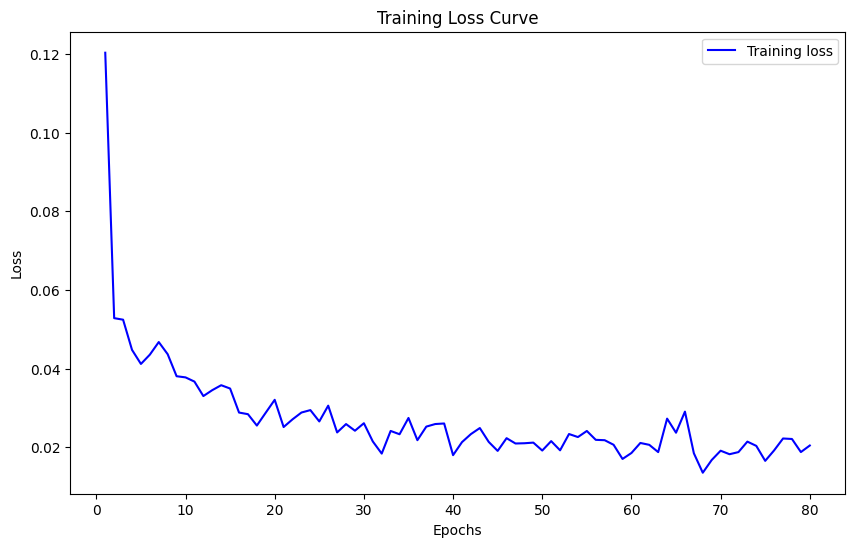

In [69]:
plot_loss_curve(epoch_loss, early_stop_epoch=None, save_path=f"{ResultsPath}/loss_curve.png")